In [131]:
#import necessary librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
#load dataset
dl_df = pd.read_csv("/content/drive/MyDrive/digital_literacy_dataset.csv")

In [133]:
#inspect data
dl_df.info()
dl_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

,Age,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Skill_Application,Overall_Literacy_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.864000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,74.840000,2.998000,75.565000,60.23040
std,13.573568,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,14.446907,1.407827,14.852487,10.29046
min,18.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,50.000000,1.000000,50.000000,32.40000
25%,29.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,63.000000,2.000000,63.000000,53.27500
50%,41.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,75.000000,3.000000,75.000000,60.30000
75%,52.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,87.000000,4.000000,88.000000,67.12500
max,64.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,100.000000,5.000000,100.000000,89.90000


In [134]:
#missing values
missing_count = dl_df.isnull().sum()
print(missing_count)


User_ID                                           0
Age                                               0
Gender                                            0
Education_Level                                 212
Employment_Status                                 0
Household_Income                                  0
Location_Type                                     0
Basic_Computer_Knowledge_Score                    0
Internet_Usage_Score                              0
Mobile_Literacy_Score                             0
Post_Training_Basic_Computer_Knowledge_Score      0
Post_Training_Internet_Usage_Score                0
Post_Training_Mobile_Literacy_Score               0
Modules_Completed                                 0
Average_Time_Per_Module                           0
Quiz_Performance                                  0
Session_Count                                     0
Engagement_Level                                  0
Adaptability_Score                                0
Feedback_Rat

In [135]:
# Impute missing Education_Level with the most frequent value (mode)
mode_value = dl_df['Education_Level'].mode()[0]
dl_df['Education_Level'].fillna(mode_value, inplace=True)

<ipython-input-135-049207a37421>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dl_df['Education_Level'].fillna(mode_value, inplace=True)


In [136]:
#check duplicates
print(dl_df.duplicated().sum())

0


In [137]:
#check datatypes
print(dl_df.dtypes)

User_ID                                          object
Age                                               int64
Gender                                           object
Education_Level                                  object
Employment_Status                                object
Household_Income                                 object
Location_Type                                    object
Basic_Computer_Knowledge_Score                    int64
Internet_Usage_Score                              int64
Mobile_Literacy_Score                             int64
Post_Training_Basic_Computer_Knowledge_Score      int64
Post_Training_Internet_Usage_Score                int64
Post_Training_Mobile_Literacy_Score               int64
Modules_Completed                                 int64
Average_Time_Per_Module                         float64
Quiz_Performance                                  int64
Session_Count                                     int64
Engagement_Level                                

In [138]:
#Numerical values
num_columns=dl_df.select_dtypes(include=['float64','int64']).columns
num_columns=[col for col in num_columns if col.lower() != 'loan_id']
print(num_columns)

['Age', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score', 'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Skill_Application', 'Overall_Literacy_Score']


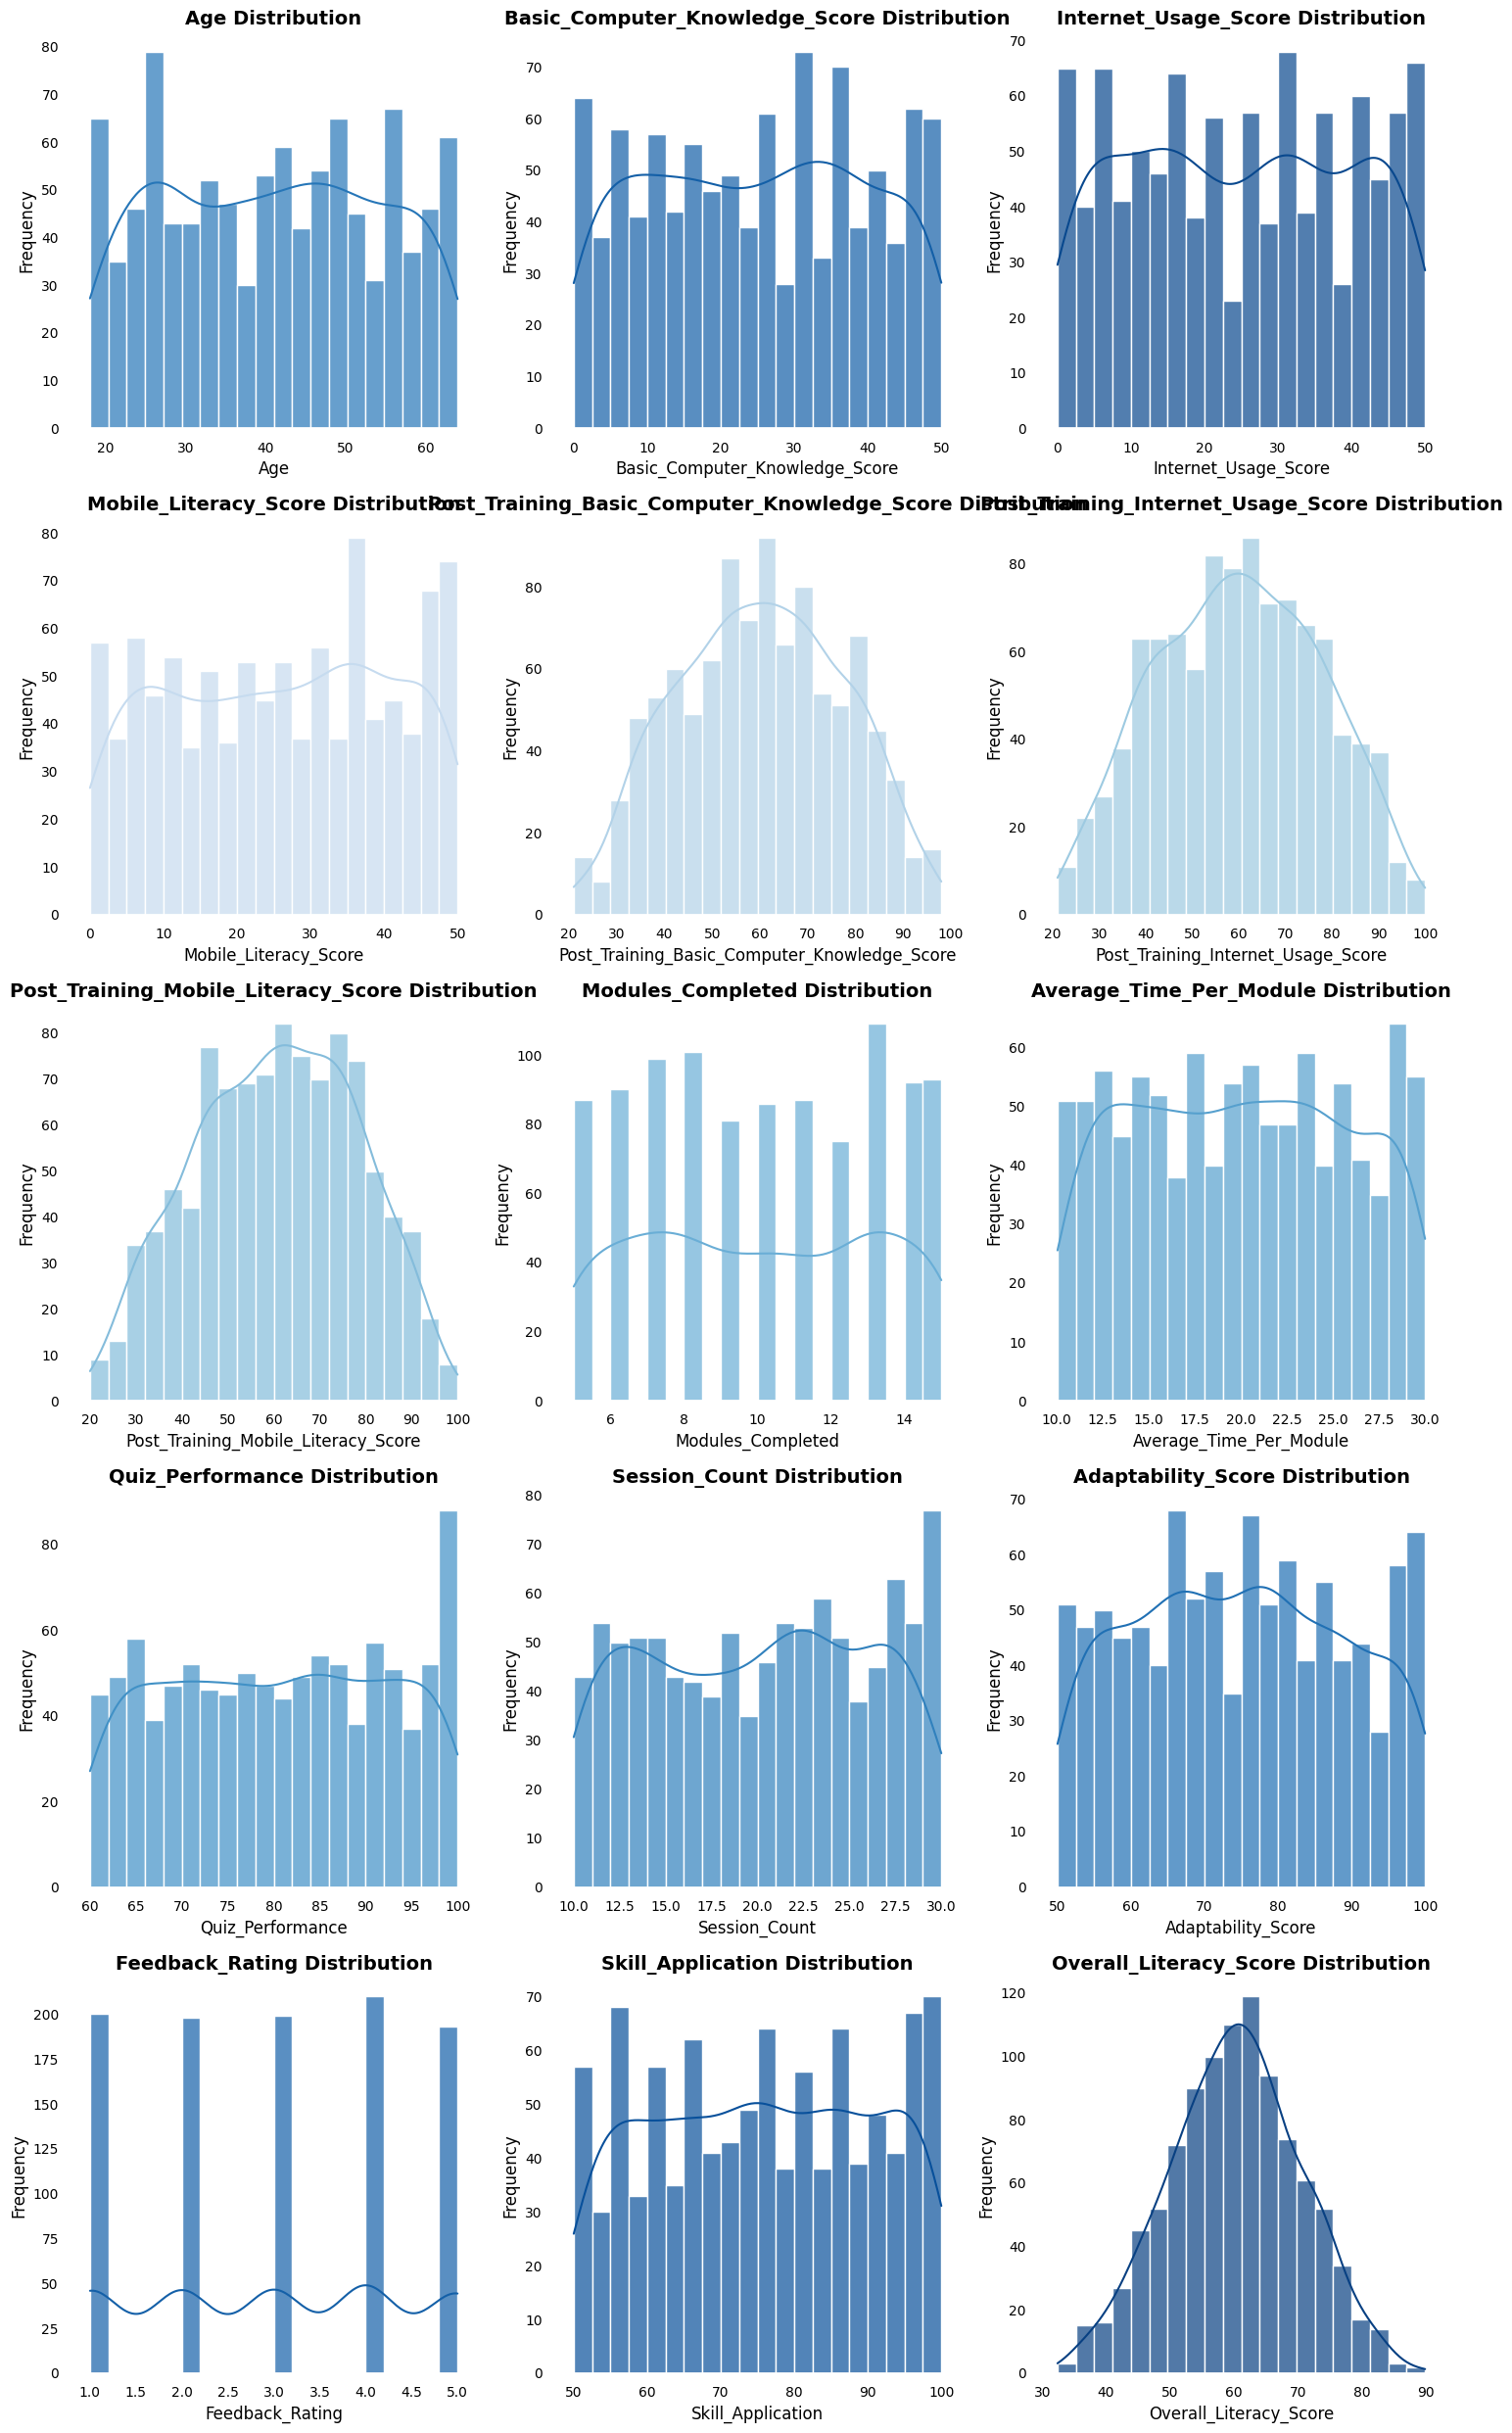

In [139]:
#Histogram of numerical columns
sns.set(style="darkgrid")
num_cols=len(num_columns)
num_rows=(num_cols//3)+(num_cols%3>0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

colors = sns.color_palette('Blues', num_cols)
dark_colors = sns.color_palette("Blues", 10)[7:10]
colors[:3] = dark_colors

for i, col in enumerate(num_columns):
  sns.histplot(dl_df[col], kde = True, bins = 20, color = colors[i], ax = axes[i], alpha= 0.7)
  axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
  axes[i].set_xlabel(col, fontsize=12, color='black')
  axes[i].set_ylabel('Frequency', fontsize=12, color='black')
  axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
  axes[i].set_facecolor('white')

for i in range(num_cols, len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [140]:
#Categorial values
cat_columns = dl_df.select_dtypes(include=['object']).columns
cat_columns= [col for col in cat_columns if col.lower()!="id"]

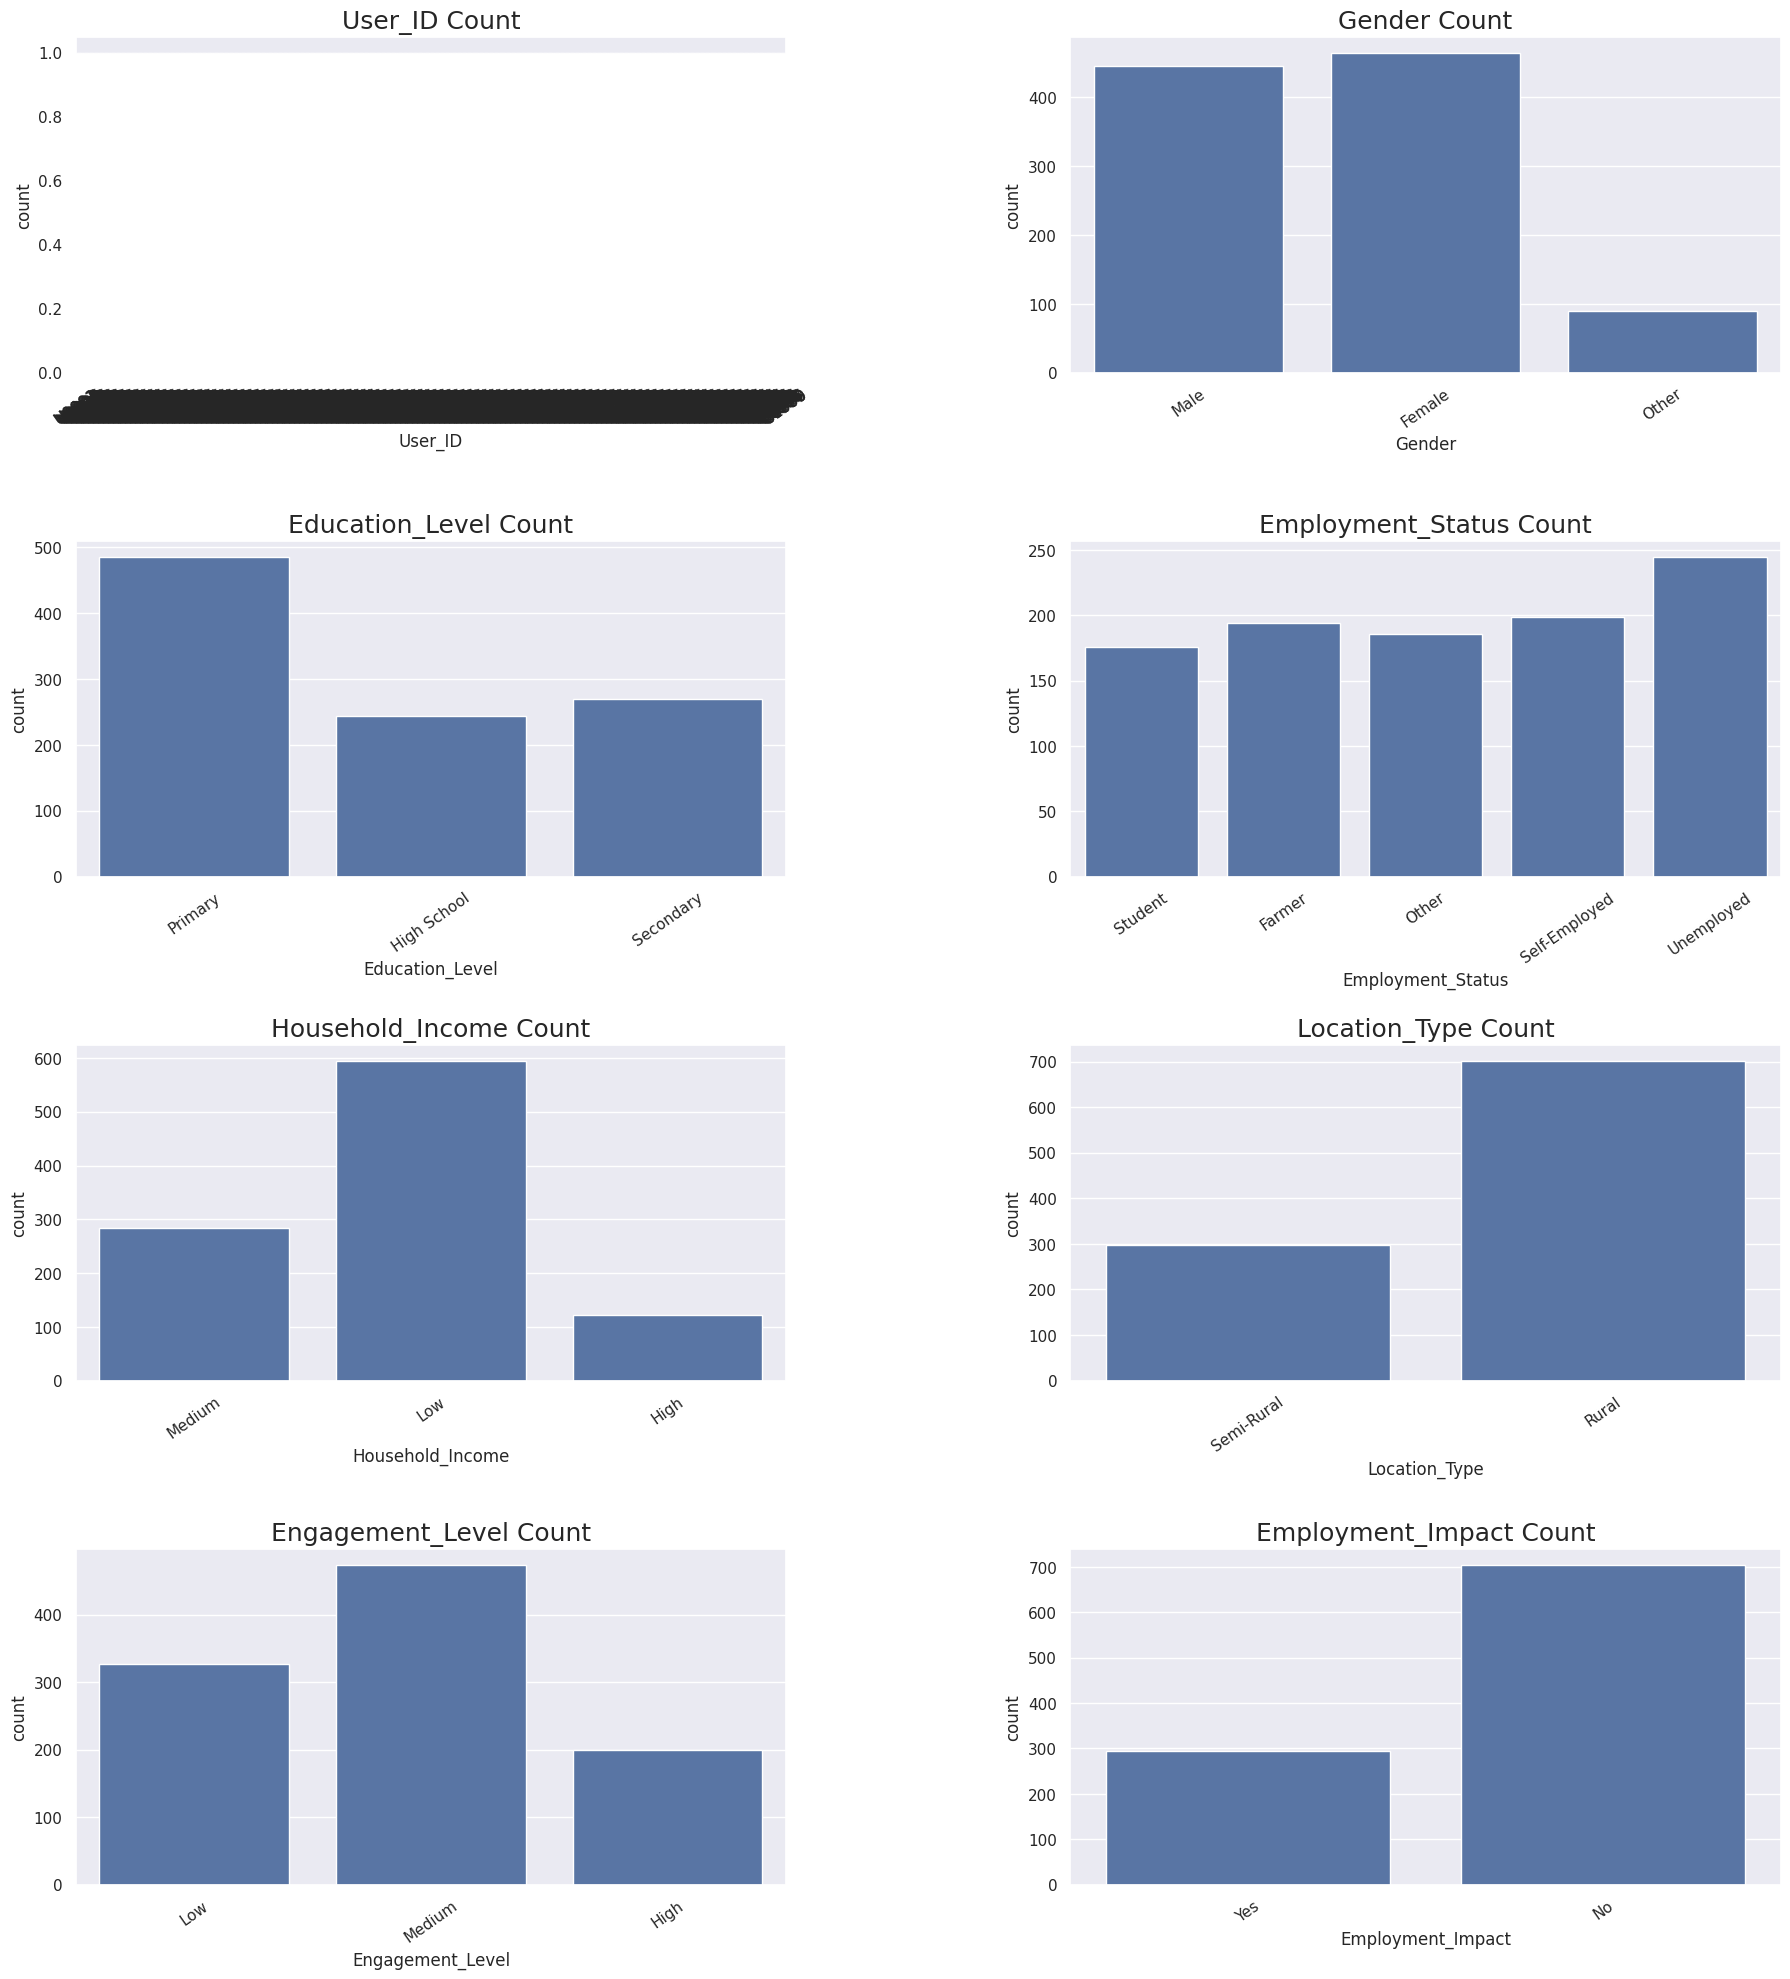

In [141]:
#Bar plot of categorial columns
# Get categorical columns and exclude 'id'
categorical_columns = dl_df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

# Determine rows and columns for the subplot grid
num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

# Create figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=dl_df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Count', fontsize=18)
    axes[i].tick_params(axis='x', rotation=35)

# Remove unused axes if any
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Show the plot
plt.show()

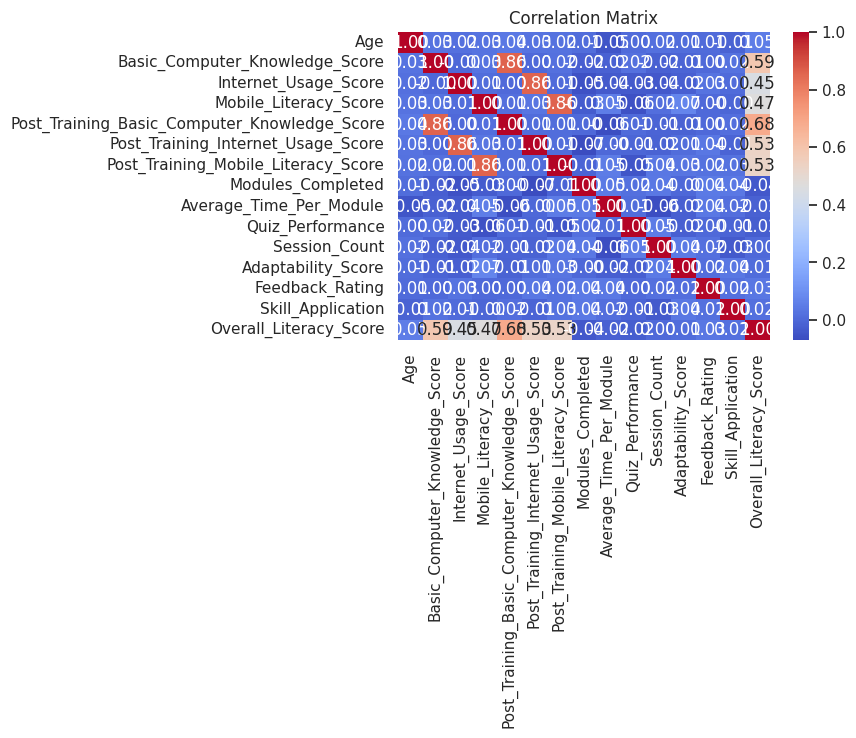

In [142]:
#Heatmap of numerical columns
num_data= dl_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

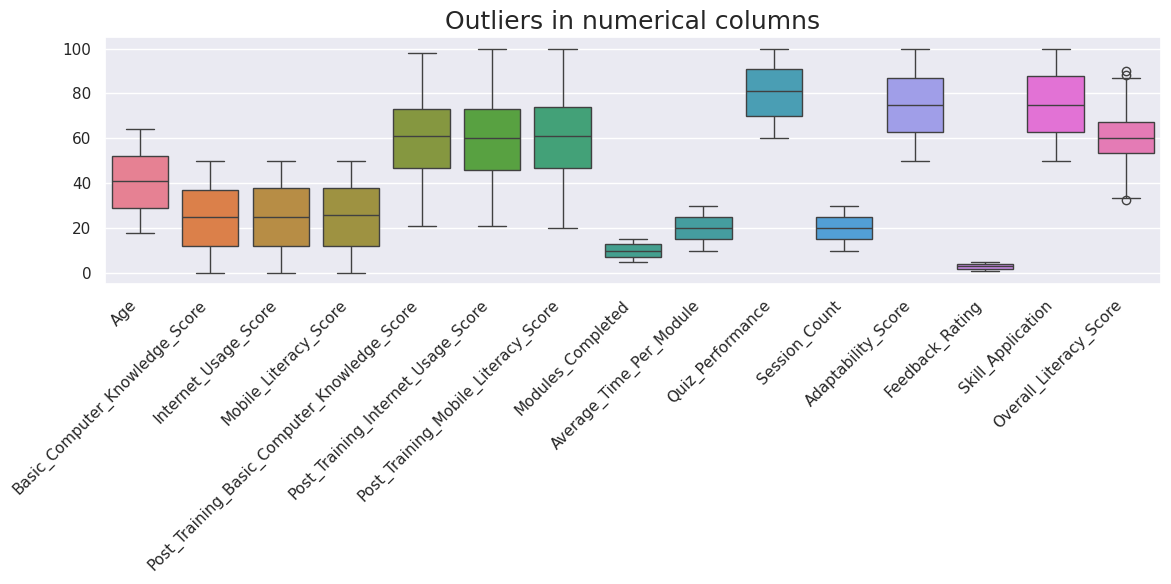

In [143]:
#Boxplot of numerical columns
num_columns = dl_df.select_dtypes(include=['float64', 'int64']).columns
num_columns = [col for col in num_columns if col.lower() != 'id']

def outliers(df, num_columns):
  outliers = {}
  for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
num_outliers = outliers(dl_df, num_columns)

plt.figure(figsize=(12,6))
sns.boxplot(data = dl_df[num_columns])
plt.title("Outliers in numerical columns", fontsize = 18)
plt.xticks(rotation = 45, ha="right")
plt.tight_layout()
plt.show()

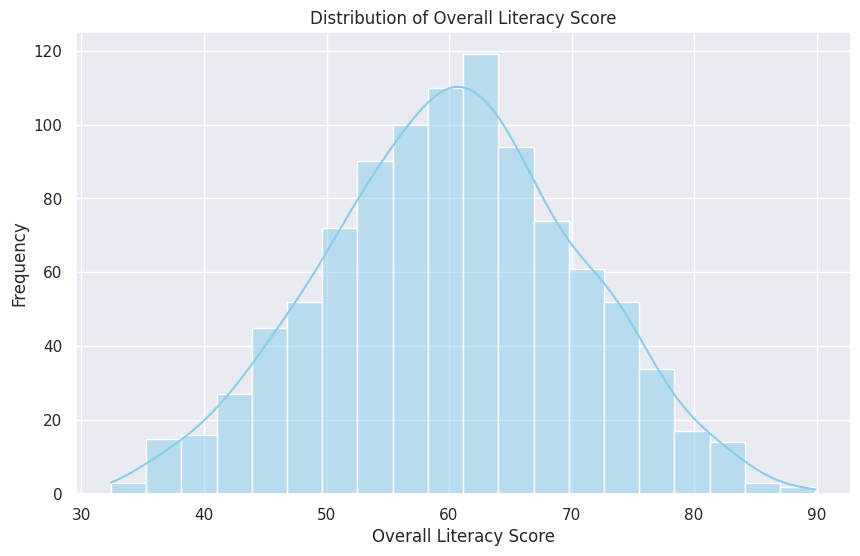

In [144]:
#Visualization of key data (Overall_Literacy_Score)
plt.figure(figsize=(10, 6))
sns.histplot(dl_df['Overall_Literacy_Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Overall Literacy Score')
plt.xlabel('Overall Literacy Score')
plt.ylabel('Frequency')
plt.show()

In [145]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [147]:
print(X.dtypes)


User_ID                                          object
Age                                               int64
Gender                                            int64
Education_Level                                   int64
Employment_Status                                 int64
Household_Income                                  int64
Location_Type                                     int64
Basic_Computer_Knowledge_Score                    int64
Internet_Usage_Score                              int64
Mobile_Literacy_Score                             int64
Post_Training_Basic_Computer_Knowledge_Score      int64
Post_Training_Internet_Usage_Score                int64
Post_Training_Mobile_Literacy_Score               int64
Modules_Completed                                 int64
Average_Time_Per_Module                         float64
Quiz_Performance                                  int64
Session_Count                                     int64
Engagement_Level                                

In [148]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
dl_df['Gender'] = label_encoder.fit_transform(dl_df['Gender'])
dl_df['Education_Level'] = label_encoder.fit_transform(dl_df['Education_Level'])
dl_df['Employment_Status'] = label_encoder.fit_transform(dl_df['Employment_Status'])
dl_df['Household_Income'] = label_encoder.fit_transform(dl_df['Household_Income'])
dl_df['Location_Type'] = label_encoder.fit_transform(dl_df['Location_Type'])
dl_df['Engagement_Level'] = label_encoder.fit_transform(dl_df['Engagement_Level'])
dl_df['Employment_Impact'] = label_encoder.fit_transform(dl_df['Employment_Impact'])

# Define the features (X) and target (y)
X = dl_df.drop(columns=["Overall_Literacy_Score", "User_ID"])  # Features (excluding target column)
y = dl_df["Overall_Literacy_Score"].values  # Target (Overall Literacy Score)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [149]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [150]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add a bias (intercept) term to the features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        # Calculate theta using the Normal Equation
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a bias (intercept) term to the features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        return X_b.dot(self.theta)

    def mean_absolute_error(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def root_mean_squared_error(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [164]:
import numpy as np

print(np.array_equal(X_train, X_test))  # Should return False


False


In [165]:
import numpy as np

print(len(np.unique(y_train)))  # Should return more than 1


359


In [166]:
print("Actual y_train values:", y_train[:5])  # Print first 5 values of y_train
print("Predicted y_train values:", y_train_pred[:5])  # Print first 5 predicted values


Actual y_train values: [60.5 56.7 56.5 61.8 38.7]
Predicted y_train values: [60.5 56.7 56.5 61.8 38.7]


In [179]:
import pandas as pd

# Convert X_train into a pandas DataFrame for correlation analysis
X_train_df = pd.DataFrame(X_train)

# Create a pandas Series for y_train
y_train_df = pd.Series(y_train)

# Combine X_train and y_train for correlation analysis
correlation_matrix = pd.concat([X_train_df, y_train_df], axis=1).corr()

# Print the correlation of each feature with the target (y_train)
print(correlation_matrix.iloc[:, -1].sort_values(ascending=False))


0                                               1.000000
Education_Level                                 0.102416
Quiz_Performance                                0.063236
Employment_Impact                               0.046548
Basic_Computer_Knowledge_Score                  0.040232
Gender                                          0.035789
Post_Training_Basic_Computer_Knowledge_Score    0.035632
Mobile_Literacy_Score                           0.033451
Post_Training_Mobile_Literacy_Score             0.022278
Average_Time_Per_Module                         0.021798
Household_Income                                0.012981
Age                                             0.012861
Engagement_Level                                0.012814
Modules_Completed                               0.004342
Employment_Status                              -0.002627
Post_Training_Internet_Usage_Score             -0.009752
Adaptability_Score                             -0.019558
Internet_Usage_Score           

In [182]:
# Remove the feature with perfect correlation (Feature 0)
X_train_cleaned = X_train[:, 1:]  # Remove column 0
X_test_cleaned = X_test[:, 1:]  # Remove column 0



InvalidIndexError: (slice(None, None, None), slice(1, None, None))

In [170]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add a bias (intercept) term to the features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        # Calculate theta using the Normal Equation
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a bias (intercept) term to the features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        return X_b.dot(self.theta)

    def mean_absolute_error(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def root_mean_squared_error(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [171]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split ,  GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [172]:
from sklearn.ensemble import RandomForestRegressor

##Model 1:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_cleaned, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_cleaned)
y_test_pred_rf = rf_model.predict(X_test_cleaned)

# Evaluate the performance
mae_train_rf = np.mean(np.abs(y_train - y_train_pred_rf))
rmse_train_rf = np.sqrt(np.mean((y_train - y_train_pred_rf) ** 2))
r2_train_rf = 1 - (np.sum((y_train - y_train_pred_rf) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

mae_test_rf = np.mean(np.abs(y_test - y_test_pred_rf))
rmse_test_rf = np.sqrt(np.mean((y_test - y_test_pred_rf) ** 2))
r2_test_rf = 1 - (np.sum((y_test - y_test_pred_rf) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Print results
print(f'Random Forest Training Data - MAE: {mae_train_rf:.2f}, RMSE: {rmse_train_rf:.2f}, R²: {r2_train_rf:.2f}')
print(f'Random Forest Testing Data - MAE: {mae_test_rf:.2f}, RMSE: {rmse_test_rf:.2f}, R²: {r2_test_rf:.2f}')


Random Forest Training Data - MAE: 0.57, RMSE: 0.76, R²: 0.99
Random Forest Testing Data - MAE: 1.57, RMSE: 2.16, R²: 0.95


In [173]:
from sklearn.ensemble import GradientBoostingRegressor
##Model 2:
# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb_model.fit(X_train_cleaned, y_train)

# Make predictions on training and testing data
y_train_pred_gb = gb_model.predict(X_train_cleaned)
y_test_pred_gb = gb_model.predict(X_test_cleaned)

# Evaluate the performance on training data
mae_train_gb = np.mean(np.abs(y_train - y_train_pred_gb))
rmse_train_gb = np.sqrt(np.mean((y_train - y_train_pred_gb) ** 2))
r2_train_gb = 1 - (np.sum((y_train - y_train_pred_gb) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

# Evaluate the performance on testing data
mae_test_gb = np.mean(np.abs(y_test - y_test_pred_gb))
rmse_test_gb = np.sqrt(np.mean((y_test - y_test_pred_gb) ** 2))
r2_test_gb = 1 - (np.sum((y_test - y_test_pred_gb) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Print the results
print(f'Gradient Boosting Training Data - MAE: {mae_train_gb:.2f}, RMSE: {rmse_train_gb:.2f}, R²: {r2_train_gb:.2f}')
print(f'Gradient Boosting Testing Data - MAE: {mae_test_gb:.2f}, RMSE: {rmse_test_gb:.2f}, R²: {r2_test_gb:.2f}')


Gradient Boosting Training Data - MAE: 0.52, RMSE: 0.65, R²: 1.00
Gradient Boosting Testing Data - MAE: 0.98, RMSE: 1.32, R²: 0.98


In [ ]:
# Define the parameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid,
                               scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest Regressor:", best_rf_params)

In [ ]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=gb_param_grid,
                               scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
gb_grid_search.fit(X_train, y_train)

# Best parameters for Gradient Boosting
best_gb_params = gb_grid_search.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_gb_params)

In [ ]:
# Compare Random Forest and Gradient Boosting models based on MSE, MAE, and R² on testing data

if (rmse_test_rf < rmse_test_gb) and (mae_test_rf < mae_test_gb) and (r2_test_rf > r2_test_gb):
    print("\nConclusion: Random Forest is the better model.")
else:
    print("\nConclusion: Gradient Boosting is the better model.")


In [ ]:
##Feature selection of Random Forest
# Assuming you have a list of feature names
feature_names = dl_df.drop('Overall_Literacy_Score', axis=1).columns  # Adjust this as needed

# Convert X_train to DataFrame with the correct column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Now, create the feature importance DataFrame
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

top_5_features = rf_feature_importance_df.head(5)
print(top_5_features)

In [ ]:
##Feature selection of Gradient Boosting
# If there are more feature names than columns, remove the last feature name (or identify which one is extra)
if len(feature_names) > X_train_cleaned.shape[1]:
    feature_names = feature_names[:X_train_cleaned.shape[1]]

# If there are missing feature names, you can manually add the missing ones based on the columns of X_train_cleaned
if len(feature_names) < X_train_cleaned.shape[1]:
    feature_names += ['feature_' + str(i) for i in range(len(feature_names), X_train_cleaned.shape[1])]

# Now create the DataFrame with the correct number of feature names
X_train_df = pd.DataFrame(X_train_cleaned, columns=feature_names)

# Create a DataFrame for feature importances
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': gb_importances
}).sort_values(by='Importance', ascending=False)
top_5_features = gb_feature_importance_df.head(5)
# Print the sorted feature importances
print(top_5_features)


In [ ]:
#Rebuild Final model with Gradient Boosting Regressor using  optimal hyperparameters
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the training and test sets for final model
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

In [ ]:
##Evaluation of Final Model
# Evaluate the performance on training data
mae_train_gb = np.mean(np.abs(y_train - y_train_pred_gb))
rmse_train_gb = np.sqrt(np.mean((y_train - y_train_pred_gb) ** 2))
r2_train_gb = 1 - (np.sum((y_train - y_train_pred_gb) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))

# Evaluate the performance on testing data
mae_test_gb = np.mean(np.abs(y_test - y_test_pred_gb))
rmse_test_gb = np.sqrt(np.mean((y_test - y_test_pred_gb) ** 2))
r2_test_gb = 1 - (np.sum((y_test - y_test_pred_gb) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

In [ ]:
##Output of final model
# Print the evaluation metrics for Final Model
print("Final Model Performance:")
print("Training Data:")
print(f"Mean Absolute Error: {mae_train_gb:.2f}")
print(f"Root Mean Squared Error: {rmse_train_gb:.2f}")
print(f"R-squared: {r2_train_gb:.2f}\n")

print("Testing Data:")
print(f"Mean Absolute Error: {mae_test_gb:.2f}")
print(f"Root Mean Squared Error: {rmse_test_gb:.2f}")
print(f"R-squared: {r2_test_gb:.2f}\n")